#**BAYESIAN RIDGE**

##**INTRODUCTION**

* Bayesian is an approach to defining and estimating statistical models. 

* Bayesian Regression can be very useful when we have insufficient data in the dataset or the data is poorly distributed. 

* The output of a Bayesian Regression model is obtained from a probability distribution, as compared to regular regression techniques where the output is just obtained from a single value of each attribute. 

* The aim of Bayesian Linear Regression is not to find the model parameters, but rather to find the ‘posterior‘ distribution for the model parameters. Not just the output y, but the model parameters are also assumed to come from a distribution. The expression for Posterior is :



 # Posterior = {(Likelihood * Prior)/ Normalization}
 
where,

* **Posterior:** It is the probability of an event to occur; say, H, given that another event; say, E has already occurred. i.e., P(H | E).

* **Prior:** It is the probability of an event H has occurred prior to another event. i.e., P(H)

* **Likelihood:** It is a likelihood function in which some parameter variable is marginalized.

This is actually equivalent to the Bayes’ Theorem which says,


 # P(A/B) = P(B/A)*P(A)/P(B)

where ,

* A and B are events,
* P(A) is the probability of occurrence of A, and 
* P(A|B) is the probability of A to occur given that event B has already occurred. 
* P(B), the probability of event B occurring cannot be 0 since it has already occurred. 

# **EXAMPLE:**









In [ ]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [ ]:
clf.predict([[1, 1]])

array([1.])

# **IMPLEMENTATION OF BAYESIAN RIDGE REGRESSION USING PYTHON**

* Here, we will perform Bayesian Ridge Regression.

*  However, the Bayesian approach can be used with any Regression technique like Linear Regression, Lasso Regression, etc. 

* We will use the scikit-learn library to implement Bayesian Ridge Regression. 

But before we get on to the code, we must understand the important parameters and attributes of a Bayesian Ridge Regressor:

# **PARAMETERS**

**1.n_iterint, default=300**

Maximum number of iterations. Should be greater than or equal to 1.

**2.tolfloat, default=1e-3**

Stop the algorithm if w has converged.

**3.alpha_1float, default=1e-6**

Hyper-parameter : shape parameter for the Gamma distribution prior over the alpha parameter.

**4.alpha_2float, default=1e-6**

Hyper-parameter : inverse scale parameter (rate parameter) for the Gamma distribution prior over the alpha parameter.

**5.lambda_1float, default=1e-6**

Hyper-parameter : shape parameter for the Gamma distribution prior over the lambda parameter.

**6.lambda_2float, default=1e-6**
Hyper-parameter : inverse scale parameter (rate parameter) for the Gamma distribution prior over the lambda parameter.

**7.alpha_initfloat, default=None**

Initial value for alpha (precision of the noise). If not set, alpha_init is 1/Var(y).

**8.lambda_initfloat, default=None**

Initial value for lambda (precision of the weights). If not set, lambda_init is 1.


**9.compute_scorebool, default=False**

If True, compute the log marginal likelihood at each iteration of the optimization.

**10.fit_interceptbool, default=True**

Whether to calculate the intercept for this model.

The intercept is not treated as a probabilistic parameter and thus has no associated variance. 

If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

**11.normalizebool, default=False**

This parameter is ignored when fit_intercept is set to False.

If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.
 
If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

**12.copy_Xbool, default=True**

If True, X will be copied; else, it may be overwritten.

**13.verbosebool, default=False**

Verbose mode when fitting the model.

# **ATTRIBUTES**

**1.coef_array-like of shape (n_features,)**

Coefficients of the regression model (mean of distribution)

**2.intercept_float**

Independent term in decision function. Set to 0.0 if fit_intercept = False.

**3.alpha_float**

Estimated precision of the noise.

**4.lambda_float**

Estimated precision of the weights.

**5.sigma_array-like of shape (n_features, n_features)**

Estimated variance-covariance matrix of the weights

**6.scores_array-like of shape (n_iter_+1,)**

If computed_score is True, value of the log marginal likelihood (to be maximized) at each iteration of the optimization. The array starts with the value of the log marginal likelihood obtained for the initial values of alpha and lambda and ends with the value obtained for the estimated alpha and lambda.

**7.n_iter_int**

The actual number of iterations to reach the stopping criterion.

**8.X_offset_float**

If normalize=True, offset subtracted for centering data to a zero mean.

**9.X_scale_float**

If normalize=True, parameter used to scale data to a unit standard deviation.

**10.n_features_in_int**

Number of features seen during fit.

**11.feature_names_in_ndarray of shape (n_features_in_,)**

Names of features seen during fit. Defined only when X has feature names that are all strings.

#**CODE:**




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression


In [ ]:
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  
lambda_ = 4.
w = np.zeros(n_features)
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
y = np.dot(X, w) + noise

In [ ]:
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

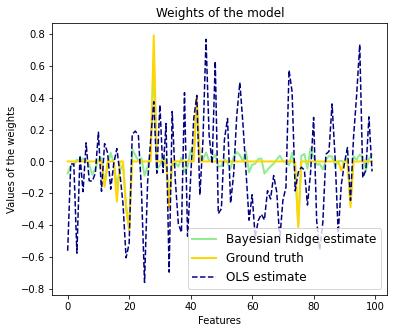

In [ ]:
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))


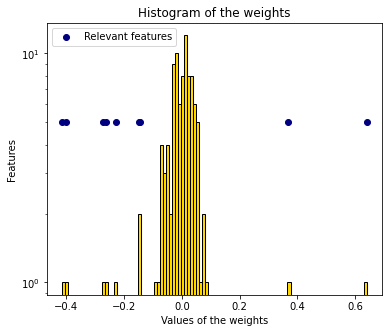

In [ ]:

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")





Text(0.5, 0, 'Iterations')

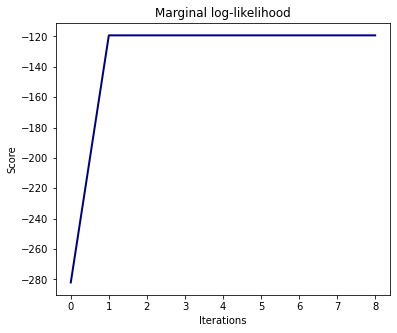

In [ ]:
plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


In [ ]:
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

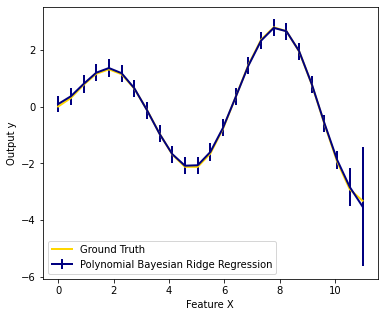

In [ ]:
X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

#**Advantages of Bayesian Ridge Regression:**

* Very effective when the size of the dataset is small.

* Particularly well-suited for on-line based learning (data is received in real-time), as compared to batch based learning, where we have the entire dataset on our hands before we start training the model. This is because Bayesian Regression doesn’t need to store data.

* The Bayesian approach is a tried and tested approach and is very robust, mathematically. So, one can use this without having any extra prior knowledge about the dataset.

# **Disadvantages of Bayesian Ridge Regression:**

* The inference of the model can be time-consuming.

* If there is a large amount of data available for our dataset, the Bayesian approach is not worth it and the regular frequentist approach does a more efficient job.

#**CONCLUSION**

* In problems where we have limited data or have some prior knowledge that we want to use in our model, the Bayesian Linear Regression approach can both incorporate prior information and show our uncertainty.

*  Bayesian Linear Regression reflects the Bayesian framework: we form an initial estimate and improve our estimate as we gather more data. 
 
* The Bayesian viewpoint is an intuitive way of looking at the world and Bayesian Inference can be a useful alternative to its frequentist counterpart. 

